In [1]:
## IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

In [2]:
## IMPORT DATA
ad_data = pd.read_csv('../input/advertising.csv')

In [3]:
## DATA EXPLORATION
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()
ad_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

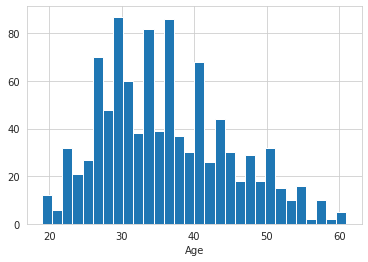

In [5]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

In [6]:
pd.crosstab(ad_data['Country'], ad_data['Clicked on Ad']).sort_values( 1,ascending = False).tail(10)

Clicked on Ad,0,1
Country,,
Slovakia (Slovak Republic),2,0
Lesotho,1,0
Malaysia,3,0
Mozambique,1,0
Nepal,3,0
Nicaragua,3,0
Niue,3,0
Reunion,2,0
Panama,2,0


In [7]:
ad_data[ad_data['Clicked on Ad']==1]['Country'].value_counts().head(10)

Australia        7
Ethiopia         7
Turkey           7
South Africa     6
Liberia          6
Liechtenstein    6
Hungary          5
France           5
Mayotte          5
Afghanistan      5
Name: Country, dtype: int64

In [8]:
ad_data['Country'].value_counts().head(10)

France            9
Czech Republic    9
Turkey            8
Afghanistan       8
Micronesia        8
Senegal           8
Australia         8
Peru              8
Cyprus            8
South Africa      8
Name: Country, dtype: int64

In [9]:
pd.crosstab(index=ad_data['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [10]:
## DATA CLEANING
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [11]:
type(ad_data['Timestamp'][1])

str

In [12]:
## VARIABLE ENCODING
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])  # Extract datetime variables using timestamp column
ad_data['Month'] = ad_data['Timestamp'].dt.month  # Converting timestamp column into datatime object in order to extract new features

In [13]:
# Creates a new column called Month, Day, Hour, 
ad_data['Day'] = ad_data['Timestamp'].dt.day
ad_data['Hour'] = ad_data['Timestamp'].dt.hour
ad_data["Weekday"] = ad_data['Timestamp'].dt.dayofweek

In [14]:
# Dropping timestamp column to avoid redundancy
ad_data = ad_data.drop(['Timestamp'], axis=1)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


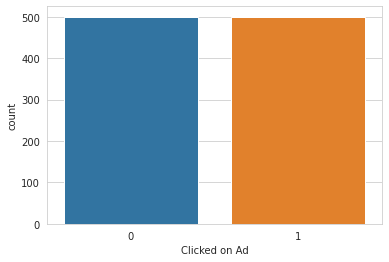

In [15]:
sns.countplot(x = 'Clicked on Ad', data = ad_data)

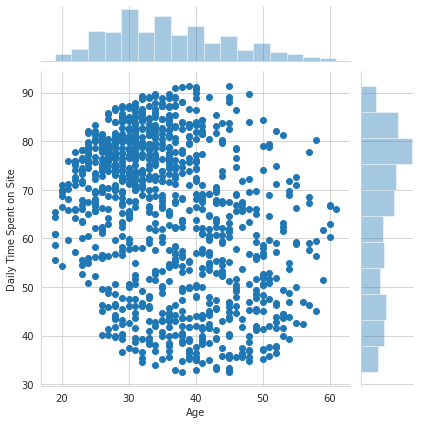

In [16]:
# Jointplot of daily time spent on site and age 
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = ad_data)

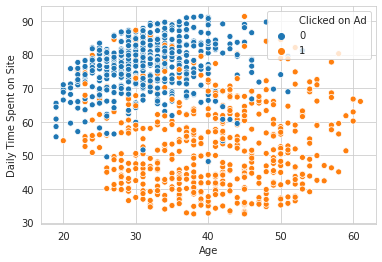

In [17]:
# scatterplot of daily time spent on site and age with clicking ads as hue
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data)

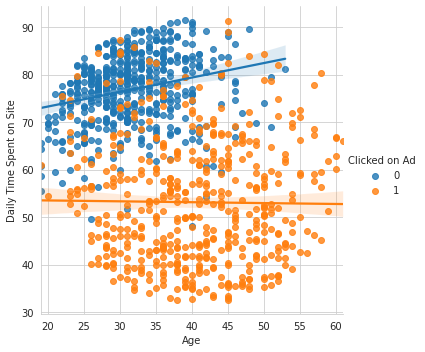

In [18]:
# Jointplot of daily time spent on site and age clicking ads as hue
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

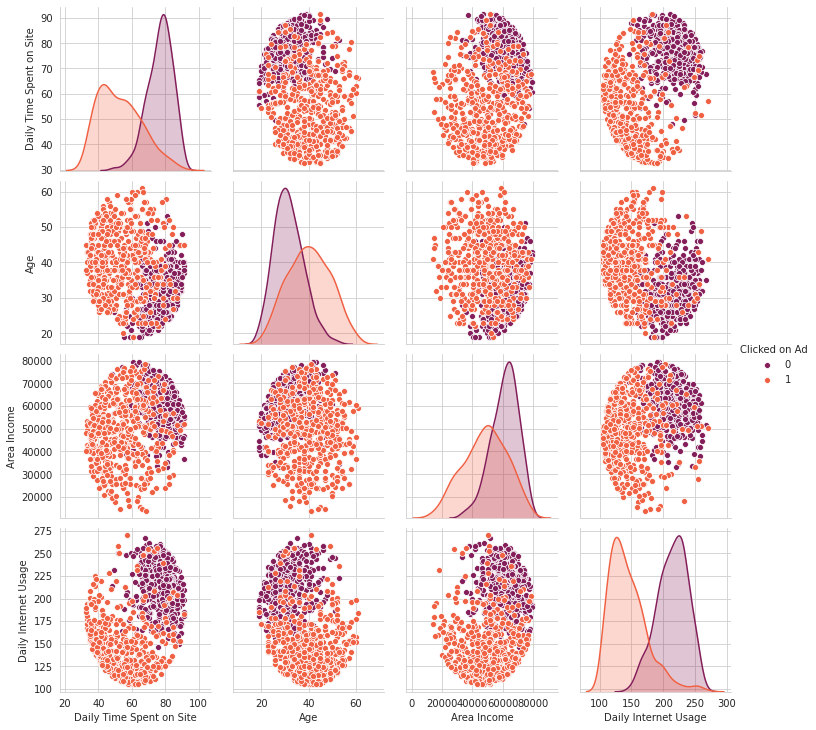

In [19]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(ad_data, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

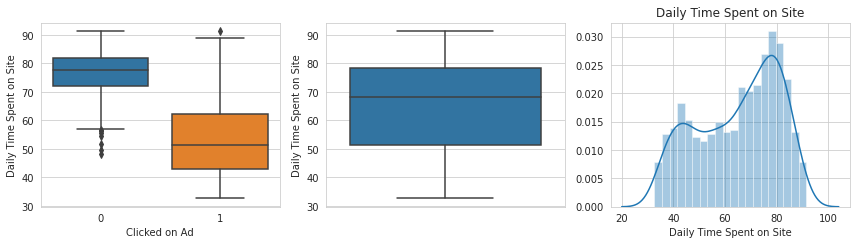

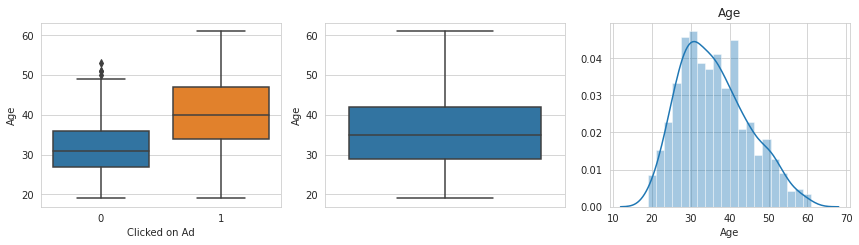

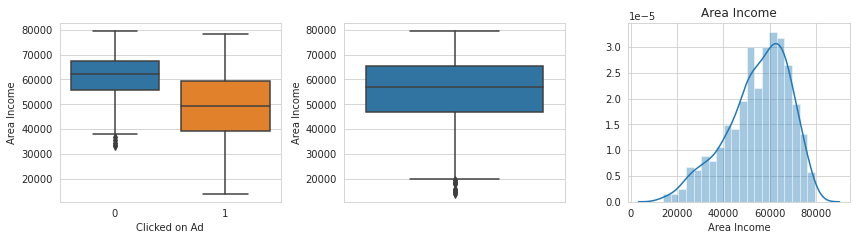

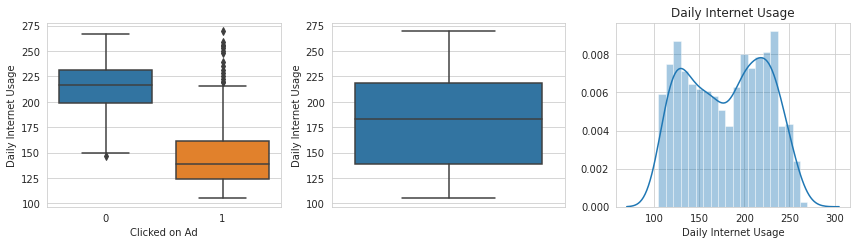

In [20]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= ad_data, y=ad_data[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= ad_data, y=ad_data[i])
    plt.subplot(2,3,3)
    sns.distplot(ad_data[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()

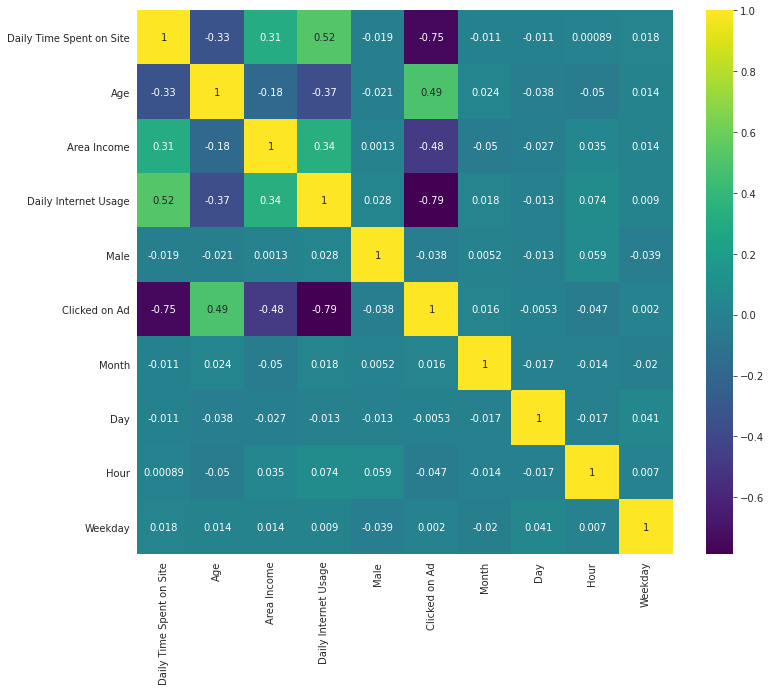

In [21]:
## VALIDATE DATASET
fig = plt.figure(figsize = (12,10))
sns.heatmap(ad_data.corr(), cmap='viridis', annot = True) # Degree of relationship i.e correlation using heatmap

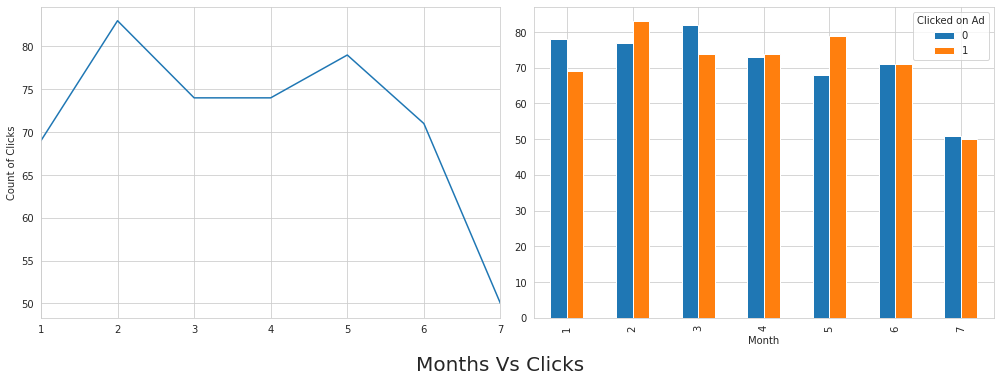

In [22]:
f,ax=plt.subplots(1,2,figsize=(14,5))
ad_data['Month'][ad_data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(ad_data["Clicked on Ad"], ad_data["Month"]).T.plot(kind = 'bar',ax=ax[1])
ad_data.groupby(['Month'])['Clicked on Ad'].sum() 
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

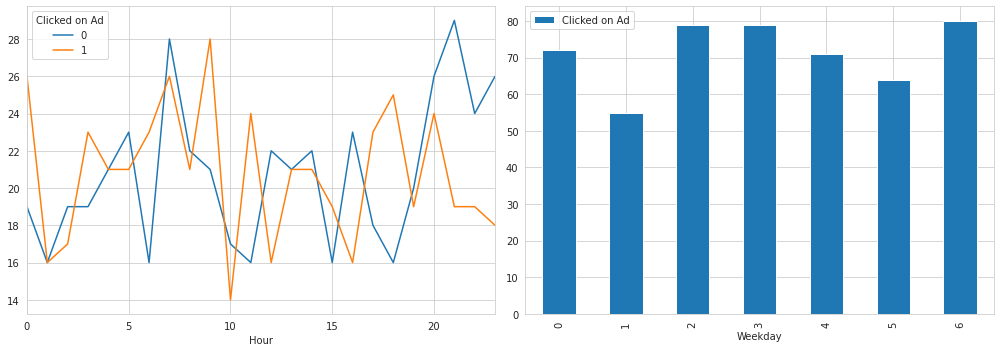

In [23]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(ad_data["Clicked on Ad"], ad_data["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(ad_data, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

In [24]:
## MODEL DEPLOYMENT
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [26]:
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
## MODEL EVALUATION
print(classification_report(y_test, predictions))
y_train_pred = cross_val_predict(logmodel, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.96      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



array([[301,  28],
       [ 54, 287]])

In [29]:
precision_score(y_train, y_train_pred)

0.9111111111111111

In [30]:
print(confusion_matrix(y_test, predictions))

[[170   1]
 [  6 153]]
